# CoVID19 Findings

This file is part of a University Project on Data Mining and Machine Learning.
Brought to you by Ioannis Loudaros and Christina Kratimenou,students in the University of Patras.
For more information read the report of the Project [here](https://github.com/iloudaros/Data-Mining-and-Machine-Learning-Project)

## 1. Early Findings about the dataset

In [634]:
# Packages that are used in this file
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

from math import isnan
from sklearn.preprocessing import  LabelEncoder

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

#Importing the dataset
dataset_file = "given/data.csv"
dataset = pd.read_csv(dataset_file)

#Exploring the dataset
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [635]:
dataset #alternatively : print(dataset.head())

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


### Data Preproccessing


#### A. Missing Values:

1. Numerical data: "Daily tests", "Cases", "Deaths" have some NaNs (We list how many, below) -> we 'll use linear interpolation (different for each country).

    The reason behind this decision is the assumption that the number of these attributes doesn't change dramatically between consecutive days.
    
2. Categorical data: We don't have any missing categorical data.

In [636]:
#Finding the number of missing values in each column
NaNs_data_dataset =  dataset.isnull().sum().sort_values(ascending=False)
print(NaNs_data_dataset)

Daily tests                        7895
Deaths                             3610
Cases                               254
Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
dtype: int64


In [637]:
# Fill the missing "Daily tests", "Cases" and "Deaths" values with interpolation, only using data from the same country.
for country in dataset["Entity"].unique():
    dataset[dataset["Entity"] == country] = dataset[dataset["Entity"] == country].interpolate()

# There is still a chance of border values missing, so we will fill them with zeros (note that these missing values are only in the beginning so our assumption is not illogical).
dataset = dataset.fillna(0)

# Round only the new values to integers
dataset["Daily tests"] = dataset["Daily tests"].round(0).astype(int)
dataset["Cases"] = dataset["Cases"].round(0).astype(int)
dataset["Deaths"] = dataset["Deaths"].round(0).astype(int)


# Making sure that we did not add any negative values 
# (This is not needed since we are using linear interpolation, but we will keep it for now in case we change the interpolation method in the future)
# nonegatives = dataset["Daily tests"]
# nonegatives[nonegatives < 0] = 0
# dataset["Daily tests"] = nonegatives

# nonegatives = dataset["Cases"]
# nonegatives[nonegatives < 0] = 0
# dataset["Cases"] = nonegatives

# nonegatives = dataset["Deaths"]
# nonegatives[nonegatives < 0] = 0
# dataset["Deaths"] = nonegatives


# Making sure that there are no missing values left 
NaNs_data_dataset =  dataset.isnull().sum().sort_values(ascending=False)
print(NaNs_data_dataset)
dataset

# Saving the proccesed dataset
dataset.to_csv("exports/data_proccesed.csv", index=False)

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64


#### B. Data Transformation

We have no need to transform the data of our dataset.

### Correlations
Let's explore the correlations existing in the data to draw some conclusions about which attributes interest us.


#### Correlation Heatmap

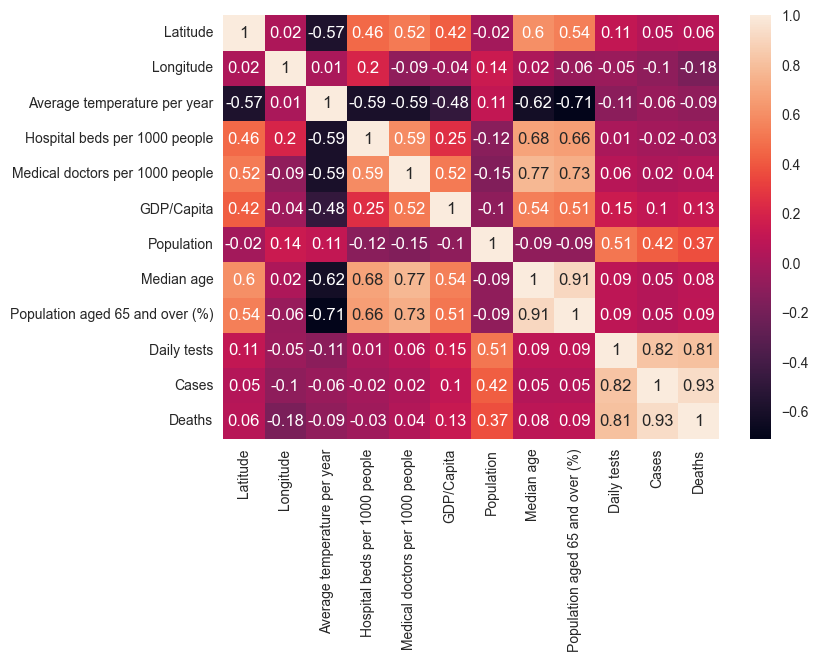

In [638]:
#Calculating the correlation matrix
to_correlate = dataset.drop(['Entity','Continent','Date'], axis=1)
corr_matrix = to_correlate.corr()

#Plotting the correlation matrix
sns.heatmap(corr_matrix.round(decimals=2),annot=True)
plt.show()

#### Graphical Correlations

##### Total Deaths and Total Cases (normalzsed by population)

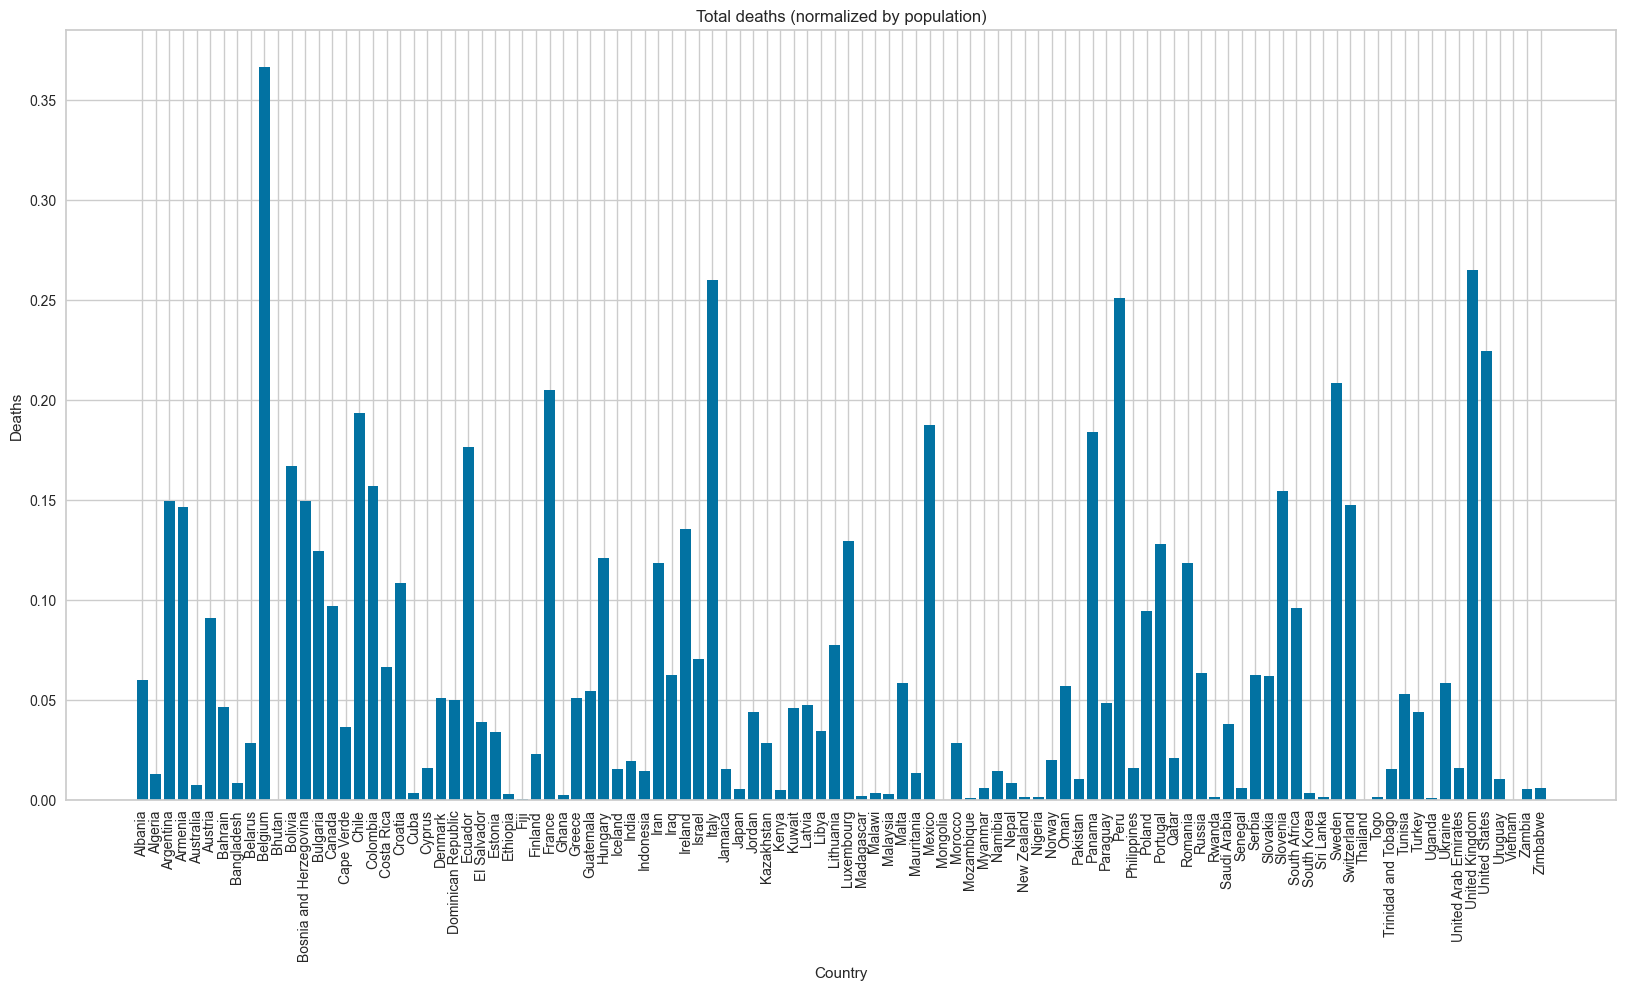

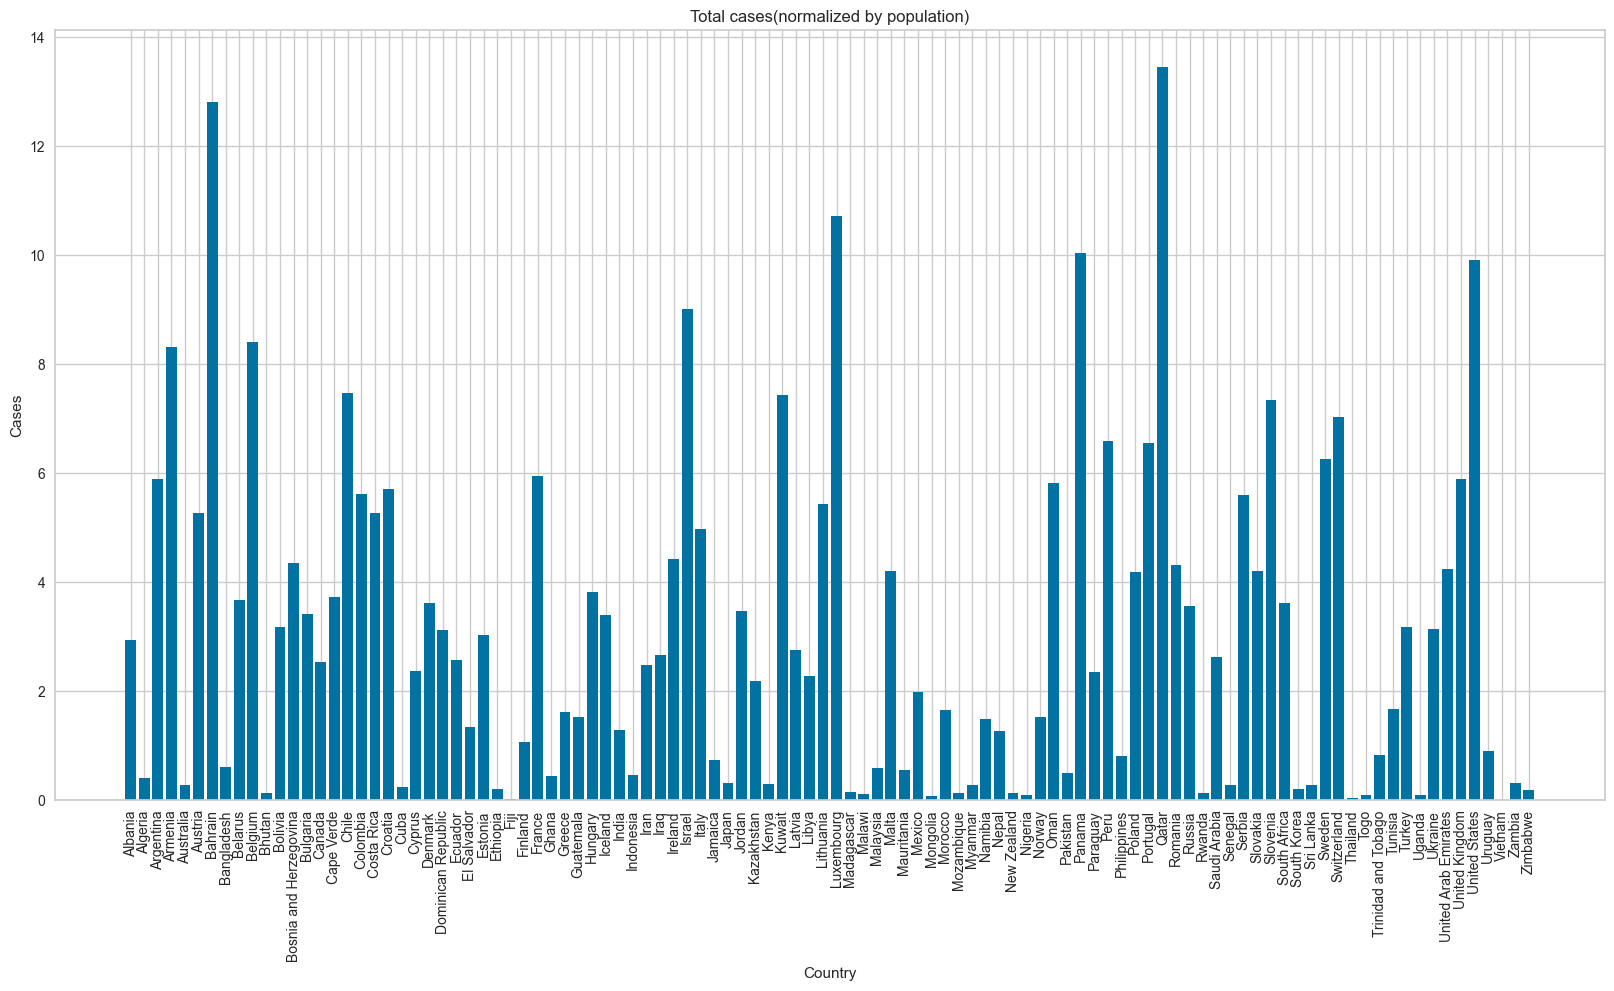

In [639]:
# Group data by country and calculate the total number of deaths and cases for each
total_deaths_by_country = dataset.groupby('Entity')['Deaths'].sum()
total_cases_by_country = dataset.groupby('Entity')['Cases'].sum()

# Normalize the data by dividing the total number of deaths and cases by the population of each country
total_deaths_by_country = total_deaths_by_country / dataset.groupby('Entity')['Population'].mean()
total_cases_by_country = total_cases_by_country / dataset.groupby('Entity')['Population'].mean()

 

# Plot the total number of deaths and cases for each country normalized by the population of each country
plt.figure(figsize=(20,10))
plt.title('Total deaths (normalized by population)')
plt.ylabel('Deaths')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.bar(total_deaths_by_country.index, total_deaths_by_country.values)
plt.figure(figsize=(20,10))
plt.title('Total cases(normalized by population)')
plt.ylabel('Cases')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.bar(total_cases_by_country.index, total_cases_by_country.values)
plt.show()

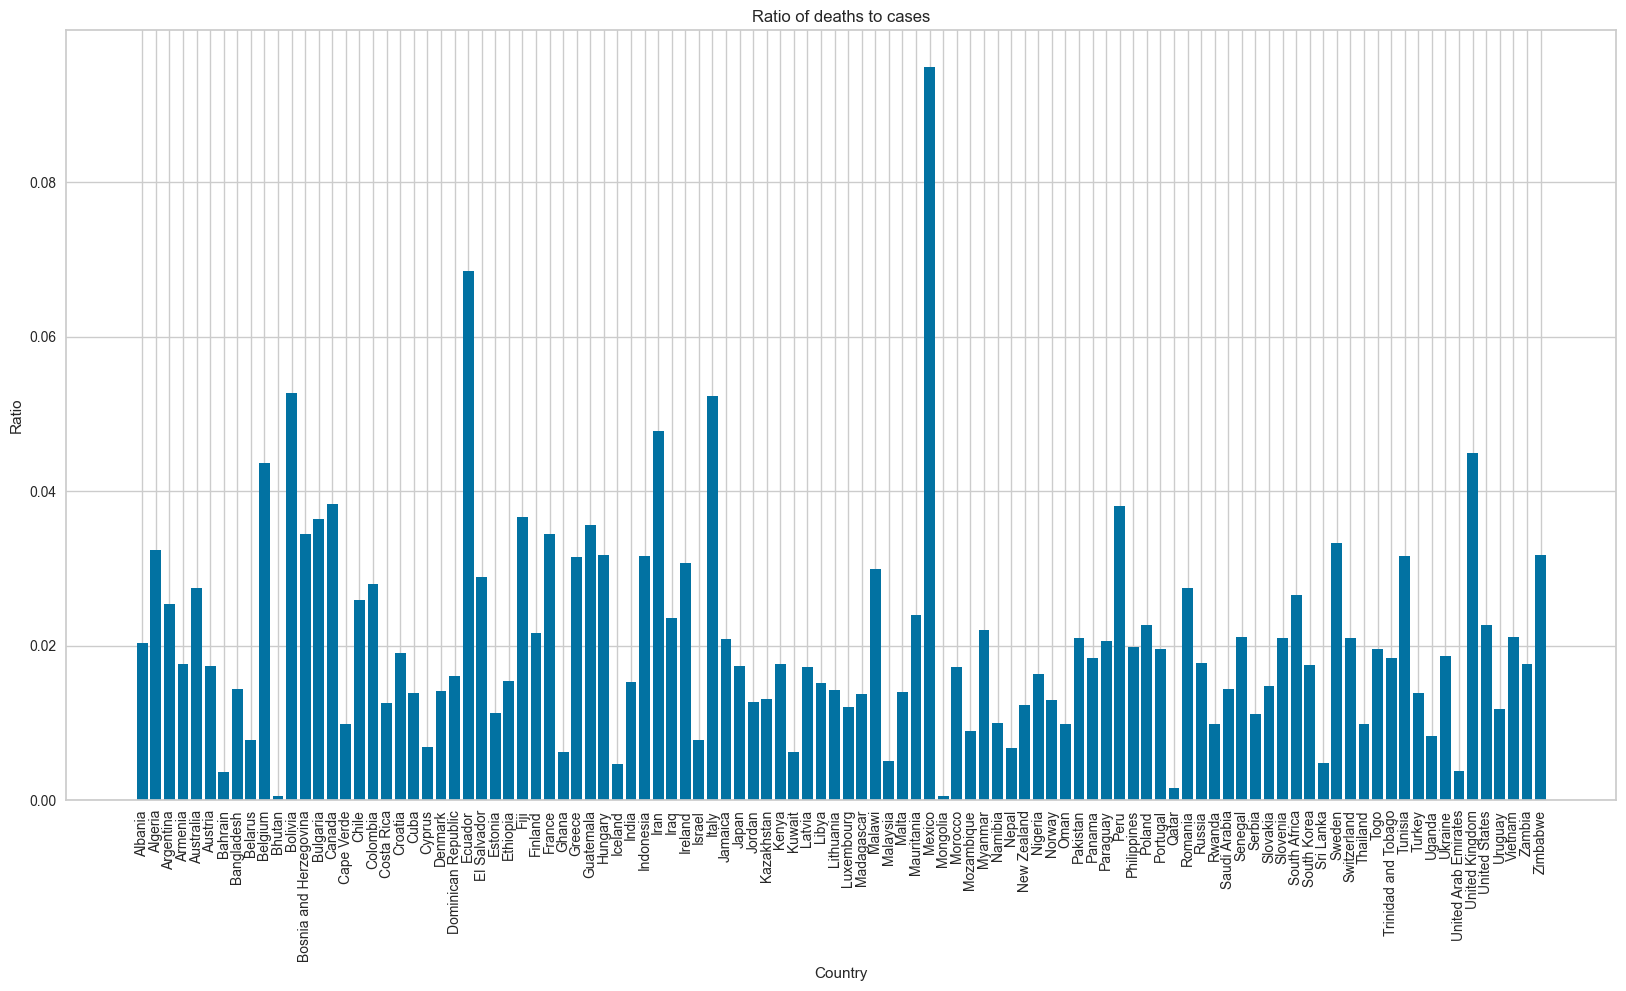

In [640]:
# Plot the ratio of deaths to cases for each country
plt.figure(figsize=(20,10))
plt.title('Ratio of deaths to cases')
plt.ylabel('Ratio')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.bar(total_deaths_by_country.index, total_deaths_by_country.values / total_cases_by_country.values)
plt.show()

##### Deaths and Cases over time per country (normalized by population)

In [641]:
# Sort the countries by the total number of deaths and cases
countries_sorted_by_deaths = total_deaths_by_country.sort_values(ascending=False).index
countries_sorted_by_cases = total_cases_by_country.sort_values(ascending=False).index

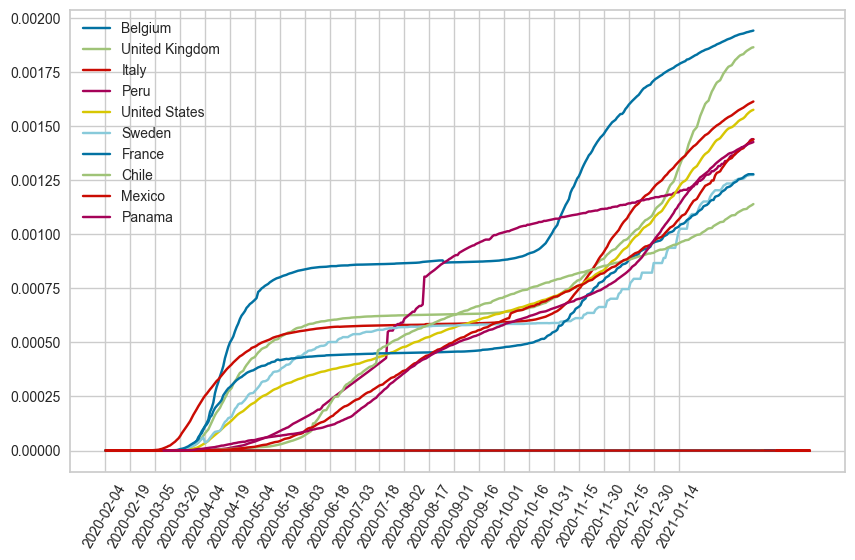

In [642]:

# Visualize deaths over time per country, normalized by population, for the 10 countries with the most deaths
plt.figure(figsize=(10,6))
for country in countries_sorted_by_deaths[0:10]:
    country_data = dataset[dataset['Entity'] == country]
    plt.plot(country_data['Date'], country_data['Deaths']/country_data['Population'], label=country)
    n = 15  # Display every 5th label
    plt.xticks(range(0, len(country_data['Deaths']), n), rotation=60)
plt.legend()
plt.show()


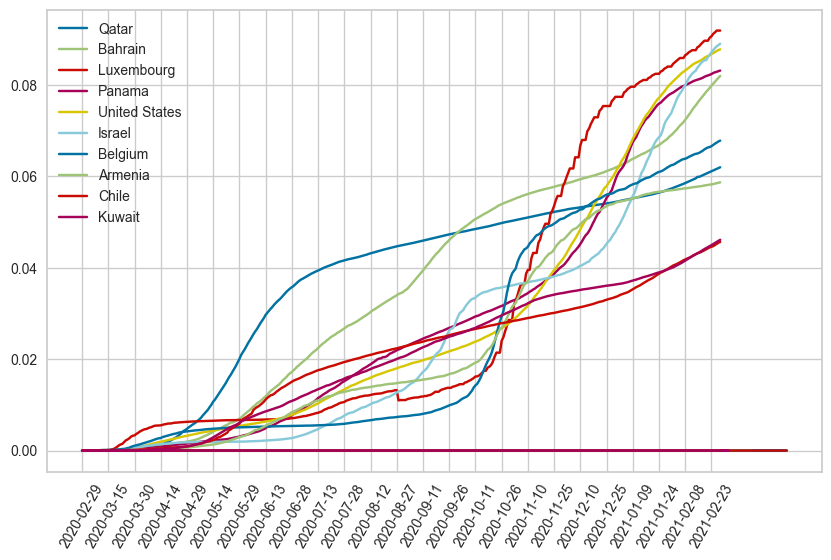

In [643]:
# Visualize cases over time per country, normalized by population, for the 10 countries with the most cases
plt.figure(figsize=(10,6))
for country in countries_sorted_by_cases[0:10]:
    country_data = dataset[dataset['Entity'] == country]
    plt.plot(country_data['Date'], country_data['Cases']/country_data['Population'], label=country)
    n = 15  # Display every 5th label
    plt.xticks(range(0, len(country_data['Cases']), n), rotation=60)
plt.legend()
plt.show()


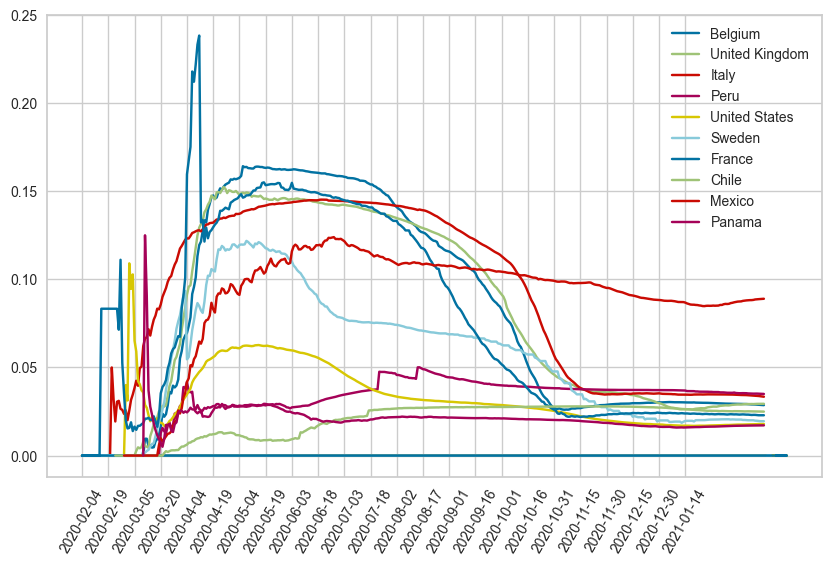

In [644]:
plt.figure(figsize=(10,6))
for country in countries_sorted_by_deaths[0:10]:
    country_data = dataset[dataset['Entity'] == country]
    plt.plot(country_data['Date'], country_data['Deaths']/country_data['Cases'], label=country)
    n = 15  # Display every 5th label
    plt.xticks(range(0, len(country_data['Cases']), n), rotation=60)
plt.legend()
plt.show()

##### Pairplot
We ll further explore some data that seemed interesting, using some pairplots

In [645]:
# Create a copy of dataset with renamed columns for improved readability
dataset_renamed = dataset.rename(columns={
    'Hospital beds per 1000 people': 'Hospitals',
    'Medical doctors per 1000 people': 'Doctors',
})

In [646]:
# Columns for pairplot
selected_columns_1 = ['Cases', 'Deaths', 'Daily tests', 'GDP/Capita']
selected_columns_2 = ['Cases', 'Deaths', 'Doctors', 'Hospitals']

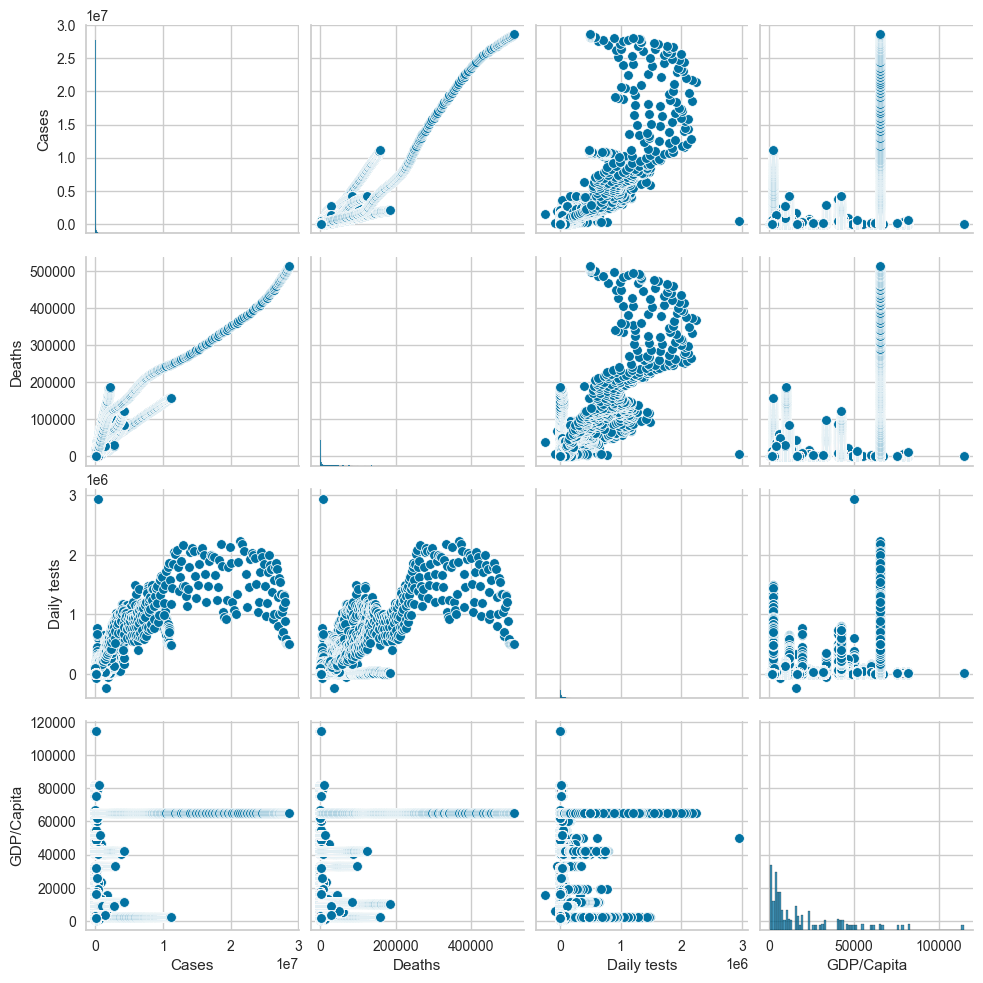

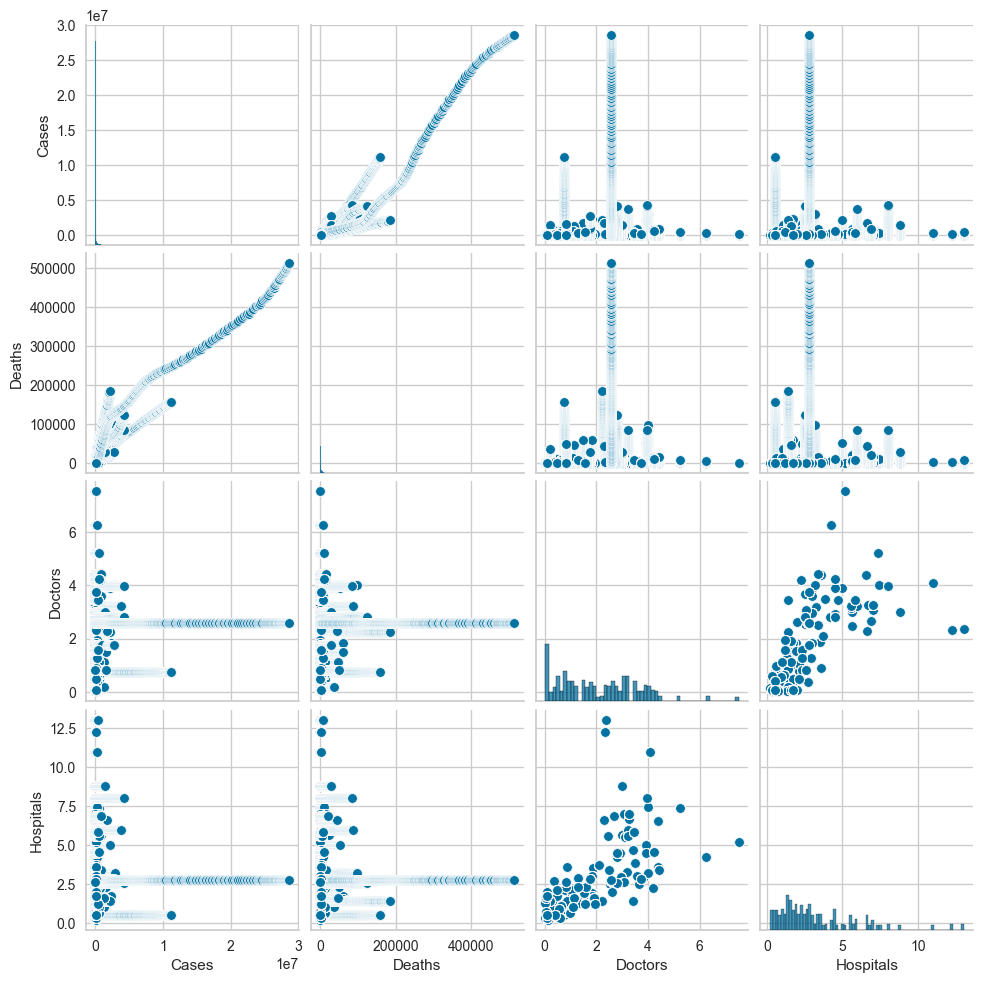

In [647]:
# Pairplot
sns.pairplot(dataset_renamed[selected_columns_1])
plt.show()

sns.pairplot(dataset_renamed[selected_columns_2])
plt.show()

## 2. Clustering

We will start by adding features that interest us into the dataframe. For example :
- Positive Test ratio
- Death to Cases ratio
- Total Cases to Population ratio
- Total Deaths to Population ratio
- Daily tests to Population ratio


Note that we ll try to cluster the countries of the dataset two times. 
- by using the raw data
- by using a scaled version of the data

In [648]:
# Group by country and calculate the sum of Cases, Deaths and Daily tests
country_features = dataset.groupby('Entity').agg({'Cases': 'sum', 'Deaths': 'sum', 'Daily tests': 'sum', 'Population': 'first', 
                                        'GDP/Capita': 'first', 'Hospital beds per 1000 people': 'first', 'Medical doctors per 1000 people': 'first'}).reset_index()

# Preprocessing: create the features we're interested in
country_features['Cases per Capita'] = country_features['Cases'] / country_features['Population']
country_features['Deaths per Capita'] = country_features['Deaths'] / country_features['Population']
country_features['Tests per Capita'] = country_features['Daily tests'] / country_features['Population']
country_features['Positivity Rate'] = country_features['Cases'] / country_features['Daily tests']
country_features['Death Rate'] = country_features['Deaths'] / country_features['Cases']

# Creating an array of the features that we ll use for clustering
features = ['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate']

### Determining the best k for the KMeans algorithm
We will use the elbow method.

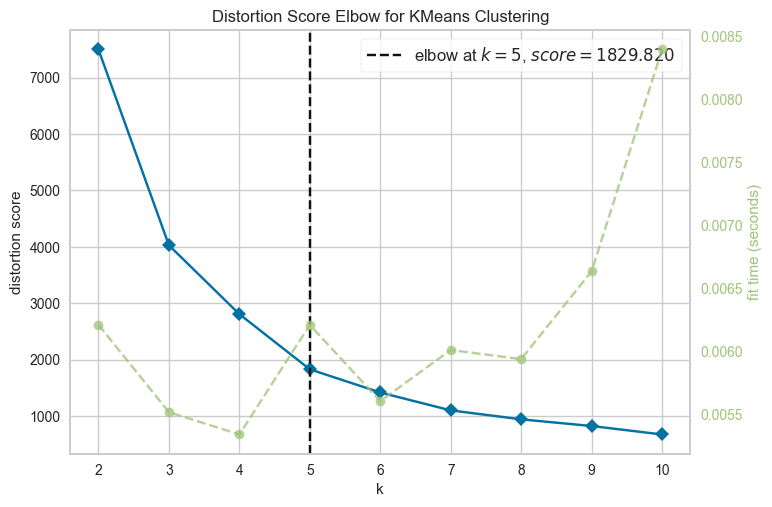

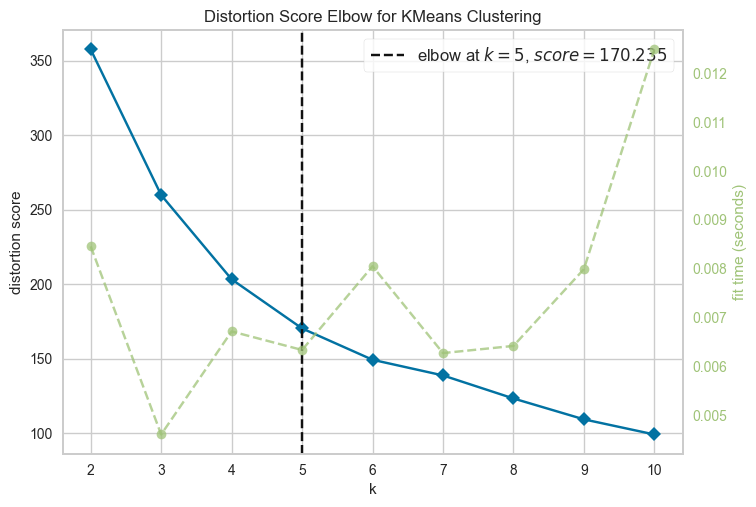

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [649]:
# Determining the best k for the k-means algorithm using the elbow method
kmeans = KMeans(n_init=10)
elbow = KElbowVisualizer(kmeans,numeric_only=None)
elbow.fit(country_features[features])
elbow.show()

# Determining the best k for the k-means algorithm using the elbow method (using a scaled dataset)
scaler = StandardScaler()
country_features_scaled = scaler.fit_transform(country_features[features])
kmeans = KMeans(n_init=10)
elbow_scaled = KElbowVisualizer(kmeans,numeric_only=None)
elbow_scaled.fit(country_features_scaled)
elbow_scaled.show()

#### Clustering the Countries using the raw data

In [650]:
# We run KMeans with optimal k=4 and then add the cluster labels to the dataframe
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(country_features[features])
country_features['Cluster'] = kmeans.labels_




#Presenting the clusters
print("----------------Cluster 0----------------------")
# print(country_features[country_features['Cluster'] == 0]['Entity'])
print("Cluster 0 contains",country_features[country_features['Cluster'] == 0]['Entity'].count(),"countries")

print("----------------Cluster 1----------------------")
# print(country_features[country_features['Cluster'] == 1]['Entity'])
print("Cluster 1 contains",country_features[country_features['Cluster'] == 1]['Entity'].count(),"countries")

print("----------------Cluster 2----------------------")
# print(country_features[country_features['Cluster'] == 2]['Entity'])
print("Cluster 2 contains",country_features[country_features['Cluster'] == 2]['Entity'].count(),"countries")

print("----------------Cluster 3----------------------")
# print(country_features[country_features['Cluster'] == 3]['Entity'])
print("Cluster 3 contains",country_features[country_features['Cluster'] == 3]['Entity'].count(),"countries")

print("----------------Cluster 4----------------------")
# print(country_features[country_features['Cluster'] == 4]['Entity'])
print("Cluster 4 contains",country_features[country_features['Cluster'] == 4]['Entity'].count(),"countries")


----------------Cluster 0----------------------
Cluster 0 contains 22 countries
----------------Cluster 1----------------------
Cluster 1 contains 8 countries
----------------Cluster 2----------------------
Cluster 2 contains 37 countries
----------------Cluster 3----------------------
Cluster 3 contains 1 countries
----------------Cluster 4----------------------
Cluster 4 contains 36 countries


        Cases per Capita           Deaths per Capita            \
                    mean       std              mean       std   
Cluster                                                          
0               3.464830  3.331967          0.057812  0.049840   
1               4.666889  2.084911          0.137584  0.049043   
2               1.982067  2.299417          0.035056  0.053200   
3               6.590868       NaN          0.250988       NaN   
4               3.668271  3.339747          0.080187  0.089408   

        Tests per Capita           Positivity Rate           Death Rate  \
                    mean       std            mean       std       mean   
Cluster                                                                   
0               0.167758  0.154506       21.589454  4.408308   0.021231   
1               0.113636  0.061626       43.244372  5.210905   0.039533   
2               0.790401  0.945414        2.833920  1.894414   0.016157   
3               0.082

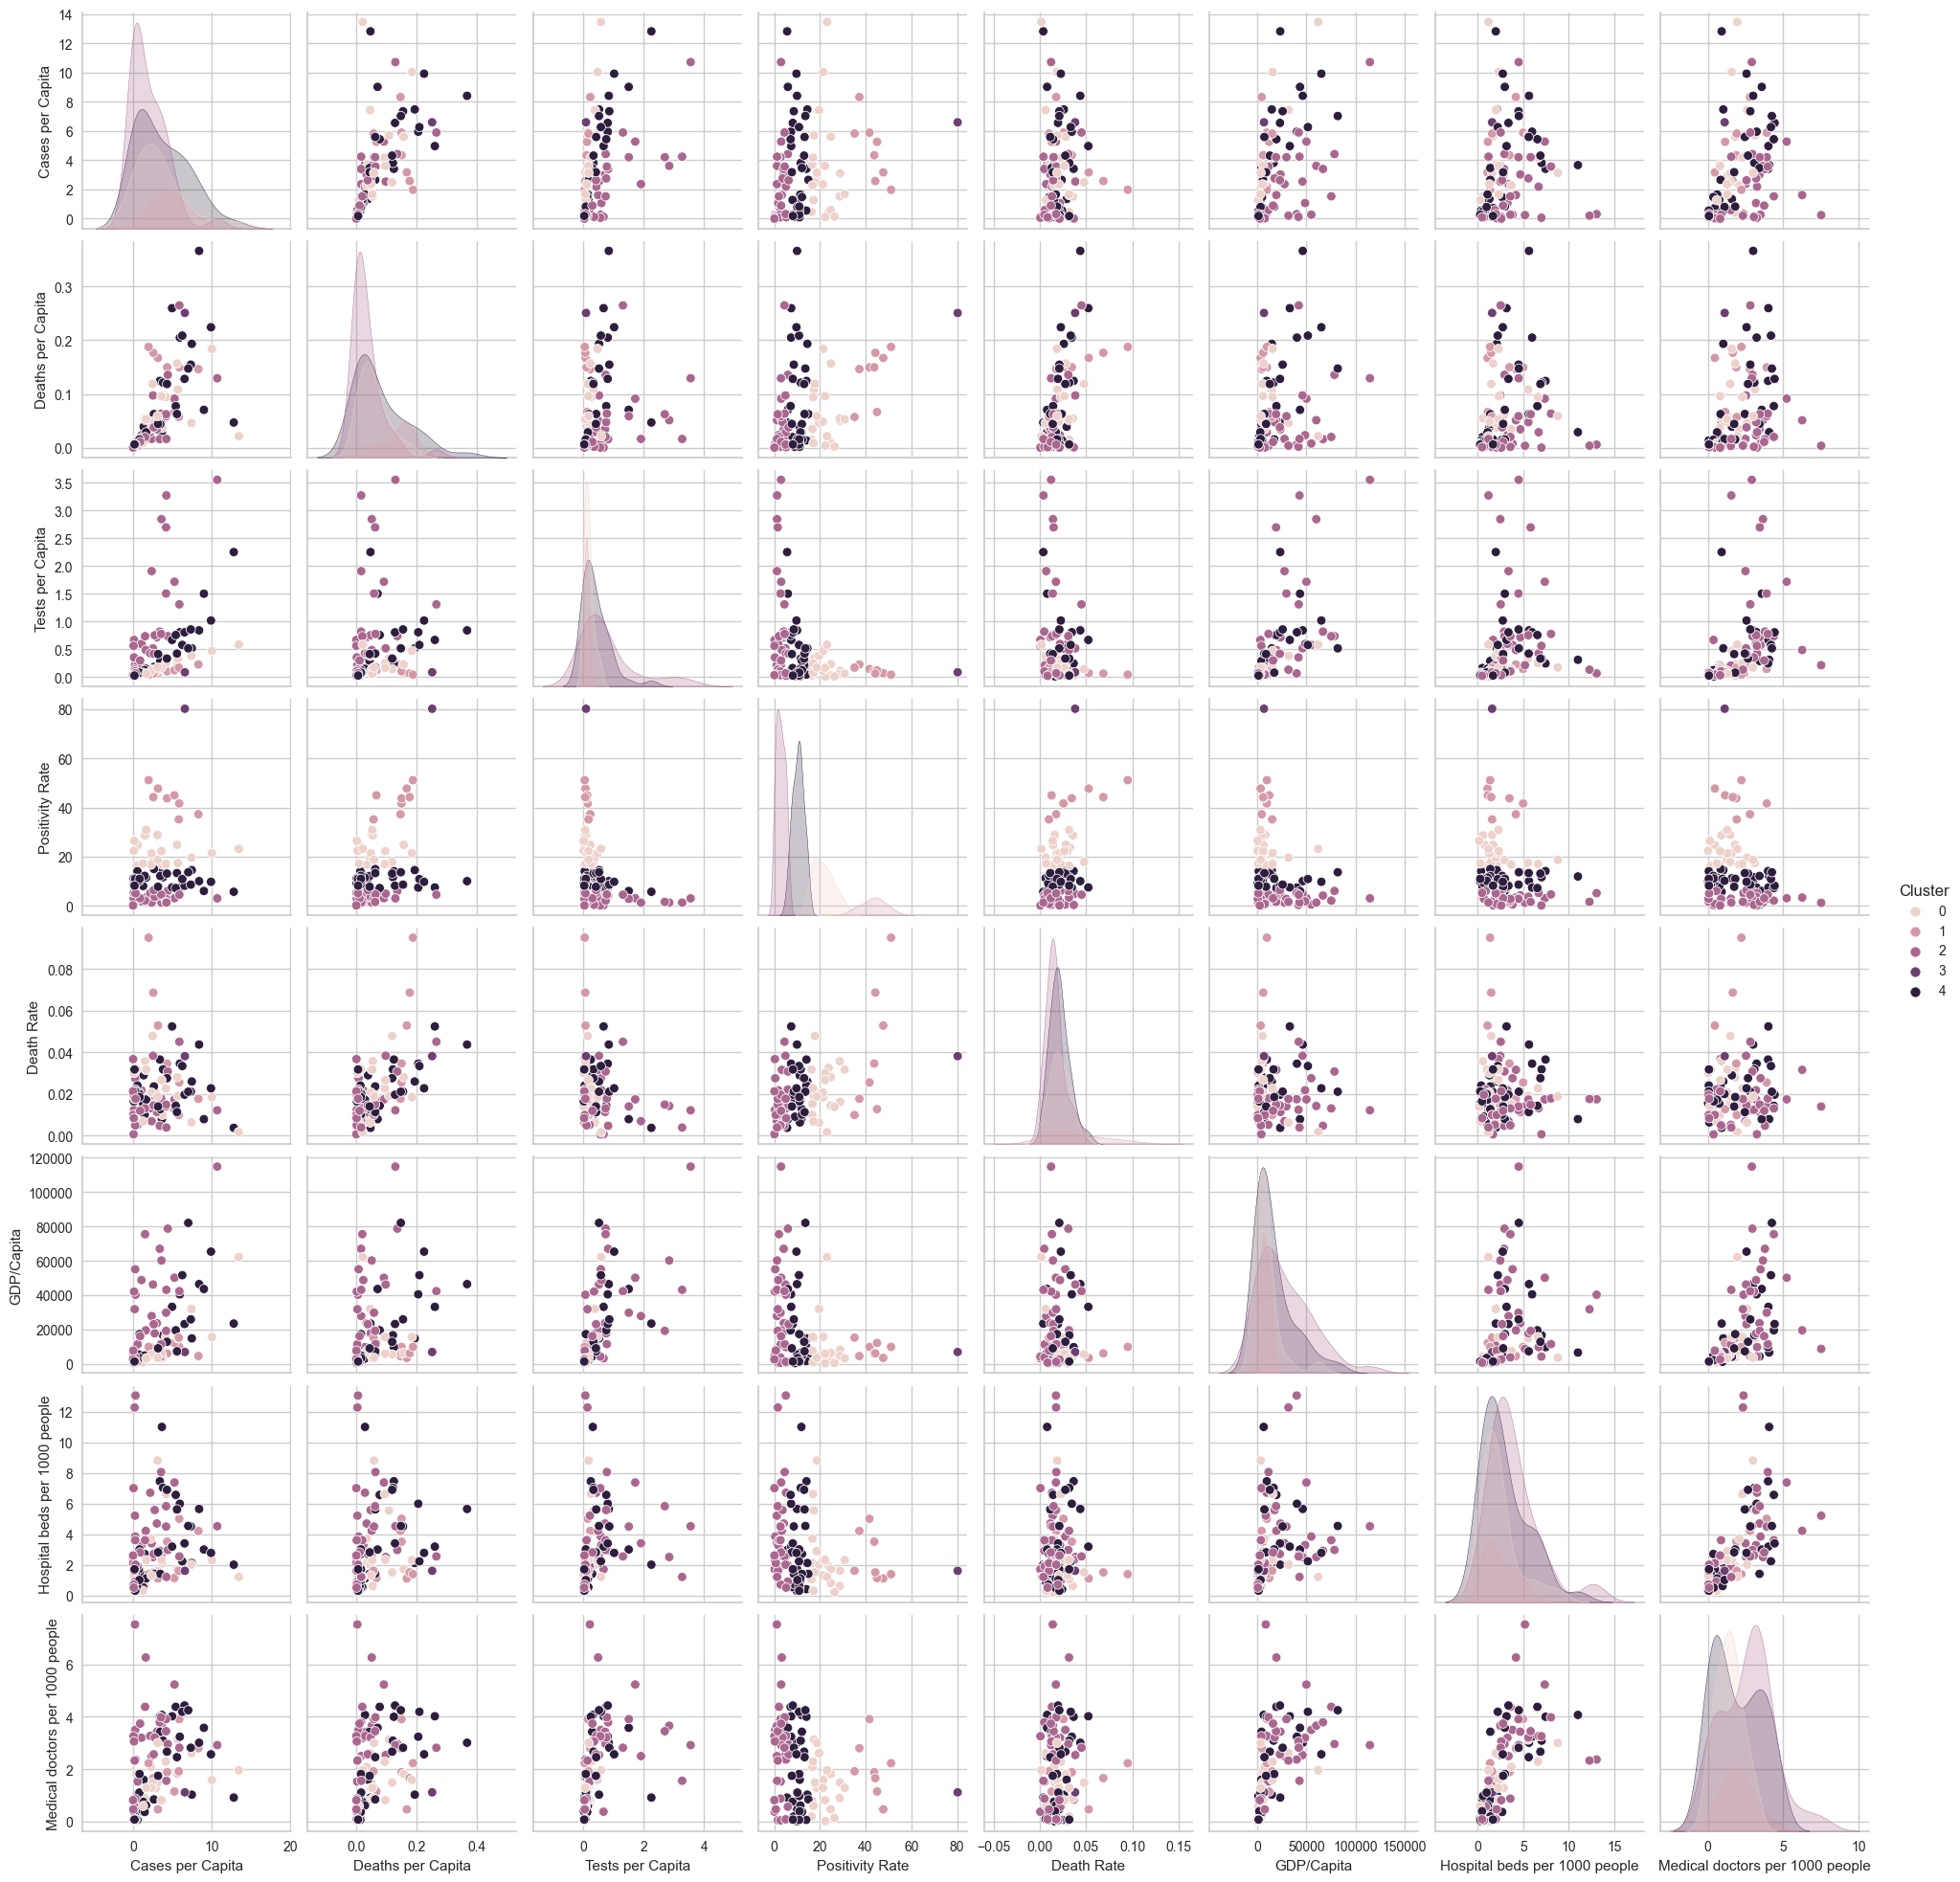

In [651]:
# Getting some statistics about the clusters
print(country_features.groupby('Cluster').agg({'Cases per Capita': ['mean', 'std'], 'Deaths per Capita': ['mean', 'std'], 'Tests per Capita': ['mean', 'std'], 'Positivity Rate': ['mean', 'std'], 'Death Rate': ['mean', 'std']}))

# Visualize the clusters
sns.pairplot(country_features, hue='Cluster', vars=['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate', 'GDP/Capita', 'Hospital beds per 1000 people', 'Medical doctors per 1000 people'])


#### Clustering the Countries using the scaled data

In [652]:
# We run KMeans with optimal k=4 and then add the cluster labels to the dataframe (using a scaled dataset)
kmeans_scaled = KMeans(n_clusters=5, n_init=10)
kmeans_scaled.fit(country_features_scaled)
country_features_scaled = country_features.copy()
country_features_scaled['Cluster'] = kmeans_scaled.labels_


#Presenting the scaled clusters
print("----------------Cluster 0----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 0]['Entity'])
print("Cluster 0 contains",country_features_scaled[country_features_scaled['Cluster'] == 0]['Entity'].count(),"countries")

print("----------------Cluster 1----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 1]['Entity'])
print("Cluster 1 contains",country_features_scaled[country_features_scaled['Cluster'] == 1]['Entity'].count(),"countries")

print("----------------Cluster 2----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 2]['Entity'])
print("Cluster 2 contains",country_features_scaled[country_features_scaled['Cluster'] == 2]['Entity'].count(),"countries")

print("----------------Cluster 3----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 3]['Entity'])
print("Cluster 3 contains",country_features_scaled[country_features_scaled['Cluster'] == 3]['Entity'].count(),"countries")

print("----------------Cluster 4----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 3]['Entity'])
print("Cluster 4 contains",country_features_scaled[country_features_scaled['Cluster'] == 4]['Entity'].count(),"countries")

----------------Cluster 0----------------------
Cluster 0 contains 9 countries
----------------Cluster 1----------------------
Cluster 1 contains 54 countries
----------------Cluster 2----------------------
Cluster 2 contains 12 countries
----------------Cluster 3----------------------
Cluster 3 contains 25 countries
----------------Cluster 4----------------------
Cluster 4 contains 4 countries


        Cases per Capita           Deaths per Capita            \
                    mean       std              mean       std   
Cluster                                                          
0               6.269593  3.638021          0.060215  0.035339   
1               1.037794  1.155521          0.015027  0.015929   
2               7.017999  1.753287          0.206077  0.067603   
3               4.582018  2.529447          0.087940  0.039107   
4               3.578210  2.066452          0.195639  0.037848   

        Tests per Capita           Positivity Rate            Death Rate  \
                    mean       std            mean        std       mean   
Cluster                                                                    
0               2.360318  0.767735        2.883337   1.846853   0.010486   
1               0.217371  0.246041        8.139537   6.713641   0.016340   
2               0.757847  0.240088       10.203328   4.574281   0.030661   
3              

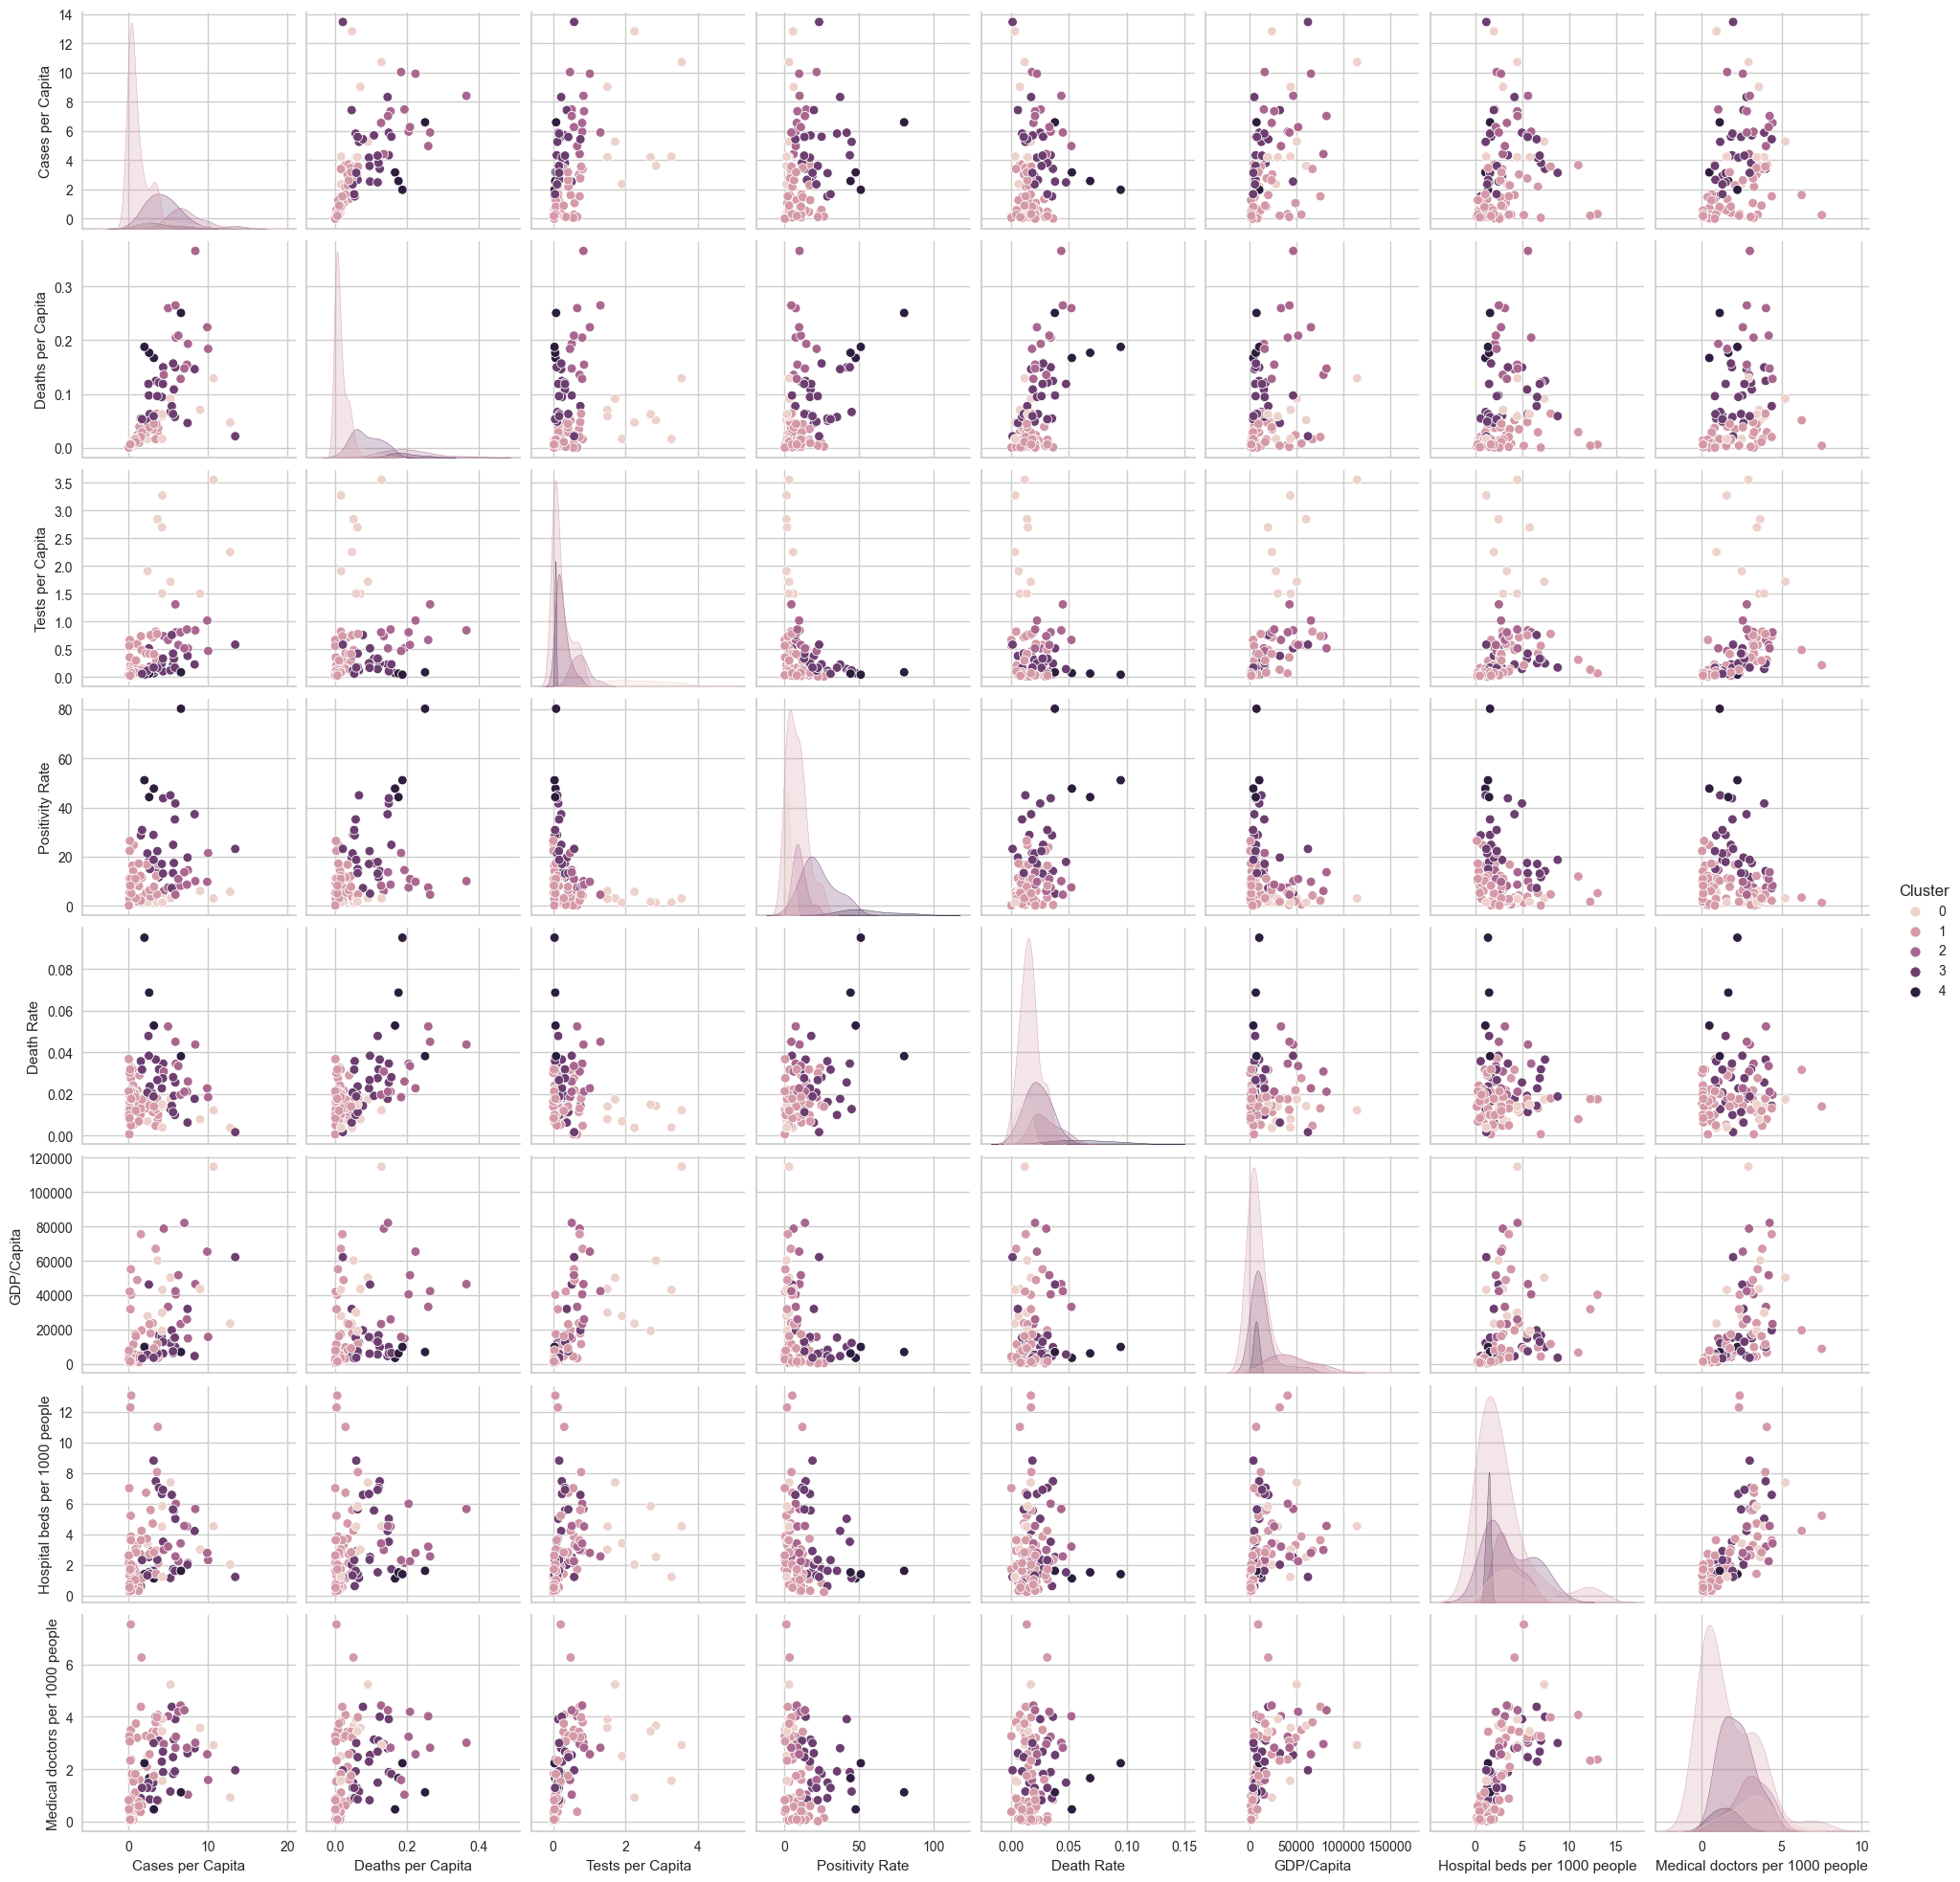

In [653]:
# Getting some statistics about the clusters
print(country_features_scaled.groupby('Cluster').agg({'Cases per Capita': ['mean', 'std'], 'Deaths per Capita': ['mean', 'std'], 'Tests per Capita': ['mean', 'std'], 'Positivity Rate': ['mean', 'std'], 'Death Rate': ['mean', 'std'], 'GDP/Capita': ['mean', 'std'], 'Hospital beds per 1000 people': ['mean', 'std'], 'Medical doctors per 1000 people': ['mean', 'std']}))

# Visualize the clusters
sns.pairplot(country_features_scaled, hue='Cluster', vars=['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate', 'GDP/Capita', 'Hospital beds per 1000 people', 'Medical doctors per 1000 people'])

# Export the clusters to a csv file
country_features_scaled.to_csv('exports/clusters.csv', index=False)

#### Trying to interpret the Clustering Results

In [654]:
# Select features and display top and bottom countries for each feature
features = ['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate', 'GDP/Capita', 'Hospital beds per 1000 people', 'Medical doctors per 1000 people']
for feature in features:
    sorted_countries = country_features.sort_values(by=feature, ascending=False)
    print(f"\n\n____Category: {feature}____")
    print("Top 3 Countries:")
    print(sorted_countries[['Entity', feature, 'Cluster']].head(3))
    
    print("Bottom 3 Countries:")
    print(sorted_countries[['Entity', feature, 'Cluster']].tail(3))



____Category: Cases per Capita____
Top 3 Countries:
        Entity  Cases per Capita  Cluster
76       Qatar         13.448664        0
6      Bahrain         12.808288        4
52  Luxembourg         10.705912        2
Bottom 3 Countries:
       Entity  Cases per Capita  Cluster
90   Thailand          0.029464        2
28       Fiji          0.012022        2
101   Vietnam          0.003446        2


____Category: Deaths per Capita____
Top 3 Countries:
            Entity  Deaths per Capita  Cluster
9          Belgium           0.366624        4
98  United Kingdom           0.265057        2
42           Italy           0.259883        4
Bottom 3 Countries:
       Entity  Deaths per Capita  Cluster
101   Vietnam           0.000073        2
10     Bhutan           0.000064        2
59   Mongolia           0.000037        2


____Category: Tests per Capita____
Top 3 Countries:
                  Entity  Tests per Capita  Cluster
52            Luxembourg          3.554257        2
97  U